In [1]:
using JSON, UnitDiskMapping, Graphs, GenericTensorNetworks, LinearAlgebra

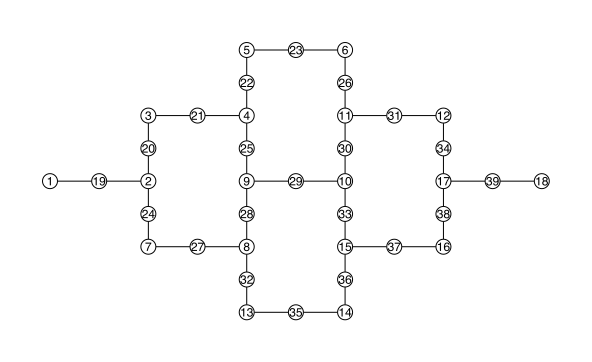

In [93]:
graphene_coordinate_weights = JSON.parsefile("graphene_coordinate_weights_mwis.json")
num_atoms = length(graphene_coordinate_weights[1])
Rb = 6.1
locs = [1e6 .* [graphene_coordinate_weights[1][i], graphene_coordinate_weights[2][i]] for i in 1 : num_atoms] 
g = unit_disk_graph(locs, Rb)
show_graph(g; locs = locs./Rb, vertex_colors = ["white" for i in 1:nv(g)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0


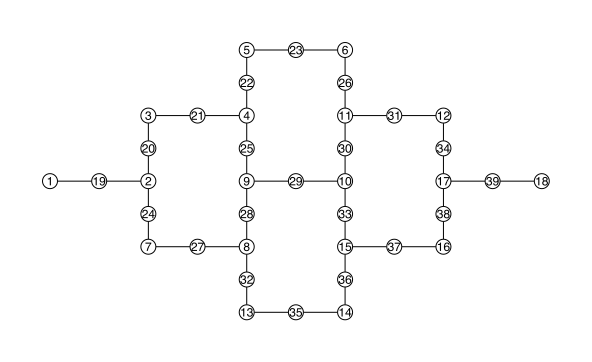

In [97]:
# weights = graphene_coordinate_weights[3] ; # weights needs to be positive, uniform here for MIS

# weights = zeros(length(graphene_coordinate_weights[3]))
# h = 1.1 * ones(18)
# weights[1:18] = 1/2 .- h

h = 0.51
weights = (1/2 .- h) * ones(length(graphene_coordinate_weights[3]))


MWIS = collect(Int, solve(IndependentSet(g; weights=weights), SingleConfigMax())[].c.data) ; 
println(MWIS[1:18])
println(MWIS, " ", sum(MWIS))
vertex_colors = [MWIS[i]==1 ? "red" : "white" for i in 1 : num_atoms]
show_graph(g, locs = locs/Rb, vertex_colors=vertex_colors)



In [31]:
weights

39-element Vector{Float64}:
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

In [ ]:
# push!(graphene_coordinate_weights, MWIS)

# open("graphene_coordinate_weights_mwis.json","w") do f 
#     write(f, JSON.json(graphene_coordinate_weights)) 
# end


In [26]:
weights

39-element Vector{Any}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

# Try a small problem

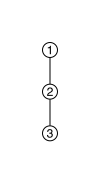

In [90]:
# locs = [[1, 1], [1, 2], [2, 1], [2, 2]]
locs = [[1, 0], [1, 2.5], [1, 5]]
num_atoms = length(locs)
Rb = 3
g = unit_disk_graph(locs, Rb)
show_graph(g; locs = locs./Rb, vertex_colors = ["white" for i in 1:nv(g)])

weights   = [0.4, 0.4, 0.4]
MWIS, sum = [1, 0, 1], 2


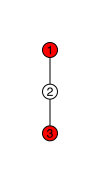

In [92]:
# weights = [0.1, 0.1, 0.1, 0.1]
# weights = [0.1, 0.1, 0.1, -1]

h = 0.1 # * ones(2)
# weights = zeros(3)
# weights[[1, 3]] = 1/2 .- h
weights = (1/2 - h) * ones(3)

MWIS = collect(Int, solve(IndependentSet(g; weights=weights), SingleConfigMax())[].c.data) ; 
println("weights   = $weights")
println("MWIS, sum = $MWIS, $(sum(MWIS))")
vertex_colors = [MWIS[i]==1 ? "red" : "white" for i in 1 : num_atoms]
show_graph(g, locs = locs/Rb, vertex_colors=vertex_colors)